In [1]:
# to identify the t-shirt size of a customer based on height and weight of a customer

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #Importing the dataset

# compute classification accuracy
from sklearn import metrics


In [3]:
# Step-1 Reading the dataset for KNN problem

dataset = pd.read_csv('VSK_KNN.csv')
dataset

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [4]:
# We are getting the data for Independent and dependent variables
X = dataset.iloc[:, [0, 1]].values # Independent variable (Height and weight)
y = dataset.iloc[:, 2].values # Dependent variable or target class (T-Shirt Size)

In [5]:
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [6]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

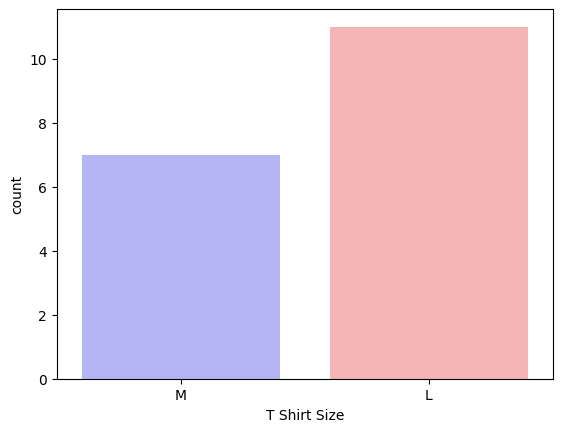

In [7]:
# we are trying to display information by a graph for T-Shirt Size (M/L)
# Seaborn itself is a graph library
import seaborn as sns

#countplot method is a plotting method to display information in terms of counting (M/L)
sns.countplot(x="T Shirt Size", data=dataset, palette="bwr")
plt.show()

In [8]:
# As we know that our T-Shirt Size values are non-integer and if we need to perform some 
# mathematical Calculations as per need, so we have to transform the non-integer values 
# into integer values

# This will encode your non-integer values into integer values

# Import LabelEncoder
from sklearn import preprocessing
#from sklearn.preprocessing import labelEncoder

#creating labelEncoder
le = preprocessing.LabelEncoder() # le is an object of labelencoder

y_new = y # now y_new will contain m/l

#y_new is variable for transformed values
# Converting string labels into numbers
y_new=le.fit_transform(y_new) # passing the T-Shirt Size values (M/L) which is represented by y variable

# we are replacing y actual values into 0 and 1.
print (y) # values in M/L
print(y_new) # now y variable will contain information in 0 and 1.

# 1 means M and 0 means L

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# As we now y_new contains information in form of 0 and 1
# so we are replacing our actual y values by 0 and 1
#Because in the next couple of lines of the codes Y variable will be 
#used for matheatical calculations

y=y_new


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


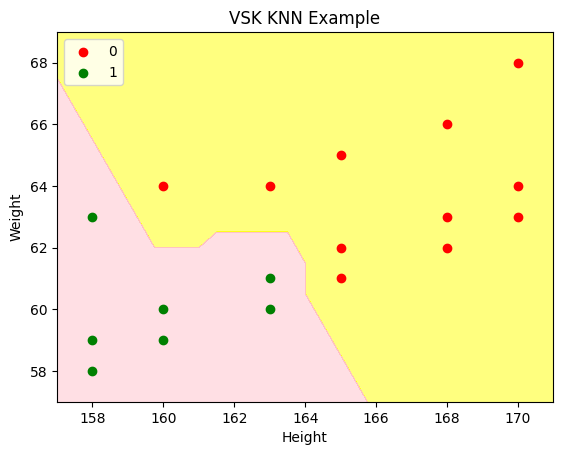

In [11]:
# We are displaying our all data points in a graph to know where these data points are lying.
# for this we are importing KNN library because our information must be fit to the KNN

from sklearn.neighbors import KNeighborsClassifier
# we have to import neighbors class and use KNeighborsClassifier method

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y) # fit to the actual dataset and no need to fit towards the training dataset

from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# You are required to pass 2-D based values into predict method rather than 1D
# ravel method is used to transform multidimensional arrays into 1-D array
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.50, cmap = ListedColormap(('yellow', 'pink')))

plt.xlim(X1.min(), X1.max()) # This is used for axis data values
plt.ylim(X2.min(), X2.max()) # x2.min = min weight value and x2.max = max weight value

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('VSK KNN Example')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [12]:
# Now its time to build KNN model
from sklearn.neighbors import KNeighborsClassifier

# Creating KNN object for KNN classifier
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean') #k=1

# Fitting the model as per actual dataset
knn.fit(X, y)

#predict the value based on the actual Independenta variables rather than testing
y_pred = knn.predict(X)

# Displaying the accuracy
print(metrics.accuracy_score(y, y_pred)) #(actual value, predicted value)

1.0


In [13]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean') #k=3
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [14]:
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean') #k=5
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8888888888888888


In [15]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean') #k=7
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9444444444444444


In [16]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean') #k=9
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8888888888888888


In [17]:
# print the shapes of X and y
# X is our features matrix with 18 x 2 dimension
print(X.shape)

# y is our response variable with 18 x 1 dimension
print(y.shape)

(18, 2)
(18,)


In [18]:
# try K=1 through K=n based on size and record testing accuracy

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 18
# We append the scores in the dictionary
for k in range(1,19): # can't take zero because k = 0 is not possible
    knn = KNeighborsClassifier(n_neighbors=k) # k value will be updated as per loop.
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

scores # It contains the list of the accuracy from 1 to 18 based on features

# It shows that k=2 and k=7 we have next highest or best accuracy other than K=1 and 3


[1.0,
 0.9444444444444444,
 1.0,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9444444444444444,
 0.8333333333333334,
 0.8888888888888888,
 0.8333333333333334,
 0.8888888888888888,
 0.8333333333333334,
 0.8888888888888888,
 0.6111111111111112,
 0.6111111111111112,
 0.6111111111111112,
 0.6111111111111112,
 0.6111111111111112]

In [19]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean') #k=3 because it has 100% accuracy

# fit the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
# to predict the t-shirt size of a customer based on new data input (161,61)=(height, weight)
print(knn.predict([[200,91]])) # 1='M' and 0='L'

# The below code is showing the predcition probabilty based on new input data of the features
print(knn.predict_proba([[200,91]]))

[0]
[[1. 0.]]


In [20]:
#

In [21]:
#

In [22]:
# now we'll see regression with KNN algorithm

In [23]:
#

In [24]:
#

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
# If we are not defining test size in the method, by default it gets 25% of test size.
#test_size = 0 but default it consider 25%

In [26]:
X_train

array([[160,  60],
       [158,  63],
       [170,  64],
       [170,  68],
       [165,  61],
       [160,  64],
       [168,  63],
       [165,  65],
       [160,  59],
       [158,  58],
       [163,  60],
       [170,  63],
       [168,  62]], dtype=int64)

In [27]:
X_test

array([[158,  59],
       [163,  61],
       [163,  64],
       [165,  62],
       [168,  66]], dtype=int64)

In [28]:
y_train

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [29]:
y_test

array([1, 1, 0, 0, 0])

In [30]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape) 
# 25% of the actual dataset when we are not passing 
# test size into train_test_split method

(13, 2)
(5, 2)


In [31]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(13,)
(5,)


In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# withput spliting into training and testing dataset we had accuracy 0.88 when k=5 

1.0


In [33]:
k_range = range(1, 13)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in (k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

scores

[1.0, 0.8, 1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6]

In [34]:
from sklearn.svm import SVC #importing SVM classifier
svm_clf = SVC() #Creating dynamic object for SVC class 
# we are creating object of the SVC class to access the various methods 
# of the SVC class

# Fit the model as per the training dataset
svm_clf.fit(X_train,y_train)

print ("Now SVM model is fit using training dataset.")

Now SVM model is fit using training dataset.


In [35]:
# Here we are building the logistic regression model
# Building the model using Logistic Regression class
from sklearn.linear_model import LogisticRegression

# we need to create an object to access the methods for logistic regression.
log_clf = LogisticRegression()

# Fitting the model as per training dataset
log_clf.fit(X_train,y_train)

print ("Now Logistic Regression model is fit using training dataset.")

Now Logistic Regression model is fit using training dataset.


In [36]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# train the model with X and y 
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [37]:
# By using predict method we can predict the model as per testing dataset

#prediction
# we need to use features or values from independent variables
# data from testing dataset
y_pred_svm = svm_clf.predict(X_test)  
# X_test contains the features on which we are predicting 

y_pred_log = log_clf.predict(X_test)
#Prediting the model by testing data

# make a prediction for an out-of-sample observation
y_pred_knn = knn.predict(X_test) # 1='M' and 0='L'


In [38]:
print ("Actual Values:", y_test) # actual testing dataset
print ("Predicted by SVM:", y_pred_svm) # predicted testing dataset for SVM
print ("Predicted by Logistic Regression:", y_pred_log) # predicted testing dataset for Logistic regression
print ("Predicted by KNN:", y_pred_knn) # predicted testing dataset for KNN


Actual Values: [1 1 0 0 0]
Predicted by SVM: [0 0 0 0 0]
Predicted by Logistic Regression: [1 0 0 0 0]
Predicted by KNN: [1 1 0 0 0]


In [39]:
# Step: 5 predicting a new value from dataset or newly inputted value

y_pred_svm_new = svm_clf.predict([[161, 61]]) 

y_pred_log_new = log_clf.predict([[161, 61]])

y_pred_knn_new = knn.predict([[161, 61]])


# print the predicted gender
print("Predicted T-Shirt Size of a person by Logistic Regression Model :", y_pred_log_new)
print("Predicted T-Shirt Size of a person by SVM Model : ", y_pred_svm_new)
print("Predicted T-Shirt Size of a person by KNN Model : ", y_pred_knn_new)

Predicted T-Shirt Size of a person by Logistic Regression Model : [1]
Predicted T-Shirt Size of a person by SVM Model :  [0]
Predicted T-Shirt Size of a person by KNN Model :  [1]


In [40]:
# When we need to calculate the accuracy of the model under classification 
# always use testing dataset to get the result

# we are measuring the performance of the model by accuracy score
from sklearn.metrics import accuracy_score

#accuracy scores
log_acc = accuracy_score(y_pred_log, y_test) #(prediction value , actual value)
svm_acc = accuracy_score(y_pred_svm, y_test)
knn_acc = accuracy_score(y_pred_knn, y_test)

print ("Accuracy of Logistic Regression Model in %:",log_acc*100)
print("Accuracy of Support Vector Machine Model in %:",svm_acc*100)
print("Accuracy of KNN Model in %:",knn_acc*100)


Accuracy of Logistic Regression Model in %: 80.0
Accuracy of Support Vector Machine Model in %: 60.0
Accuracy of KNN Model in %: 100.0


In [41]:
# When we have large amount of dataset, SVM will be better than others
# When we have small amount of datset, SVM doen not provide better accuracy 
# and at that time Logistic Regression and KNN is better.

In [42]:
# Classification report as summary of measuring of the models (Logistic Regression, SVM, KNN)
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_log))
print(classification_report (y_test,y_pred_svm))
print(classification_report (y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera